In [2]:
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv("~/Documents/jtnp_routesAndDesc_joined_reducedv2.csv")
data.head()
coords = data.as_matrix(columns=['latitude', 'longitude'])
coords

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[  34.0148, -116.1654],
       [  34.0154, -116.1581],
       [  33.9534, -116.087 ],
       ...,
       [  34.0182, -116.0737],
       [  34.0325, -116.2034],
       [  34.0148, -116.1654]])

In [5]:
kms_per_radian = 6371.0088
epsilon = .1 / kms_per_radian
min_sample=10
db = DBSCAN(eps=epsilon, min_samples=min_sample, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 42


In [104]:
clusters[0]

array([[  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654],
       [  34.0148, -116.1654]])

In [6]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

#Find the point in each cluster that is closest to its centroid
centermost_points = []
for cluster in clusters.iteritems():
    if len(cluster[1]) >= min_sample:
        centermost_points.append(get_centermost_point(cluster[1]))
        #print(centermost_points)


In [7]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

In [2]:
rs = rep_points.apply(lambda row: data[(data['latitude']==row['lat']) & (data['longitude']==row['lon'])].iloc[0], axis=1)
rs_centroids = rs[['latitude','longitude']]
rs_centroids

NameError: name 'rep_points' is not defined

In [9]:
campsites = pd.read_csv("~/Documents/jtnp_campsite_coords.csv")
campsites

,campsite,latitude,longitude
0,Belle,34.0018,-116.0203
1,Black Rock,34.0736,-116.3901
2,Cottonwood,33.7429,-115.8151
3,Hidden Valley,34.0170,-116.1615
4,Indian Cove,34.0948,-116.1594
5,Jumbo Rocks,33.9919,-116.0625
6,Ryan,33.9830,-116.1547
7,White Tank,33.9848,-116.0167


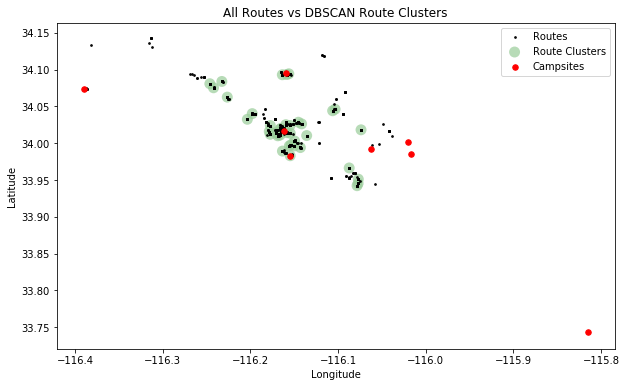

In [10]:
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['longitude'], rs['latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
data_scatter = ax.scatter(data['longitude'], data['latitude'], c='k', alpha=0.9, s=3)
camp_scatter = ax.scatter(campsites['longitude'], campsites['latitude'], c='r', alpha=1, s=30)
ax.set_title('All Routes vs DBSCAN Route Clusters')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([data_scatter, rs_scatter, camp_scatter], ['Routes', 'Route Clusters', 'Campsites'], loc='upper right')
plt.show()

In [119]:
campsites = pd.read_csv("~/Documents/jtnp_campsite_coords.csv")
campsites

,campsite,latitude,longitude
0,Belle,34.0018,-116.0203
1,Black Rock,34.0736,-116.3901
2,Cottonwood,33.7429,-115.8151
3,Hidden Valley,34.0170,-116.1615
4,Indian Cove,34.0948,-116.1594
5,Jumbo Rocks,33.9919,-116.0625
6,Ryan,33.9830,-116.1547
7,White Tank,33.9848,-116.0167


In [127]:
# centroids to campsite
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

rs_cent_lat = rs_centroids['latitude']
rs_cent_long = rs_centroids['longitude']
campsites_lat = campsites['latitude']
campsites_long = campsites['longitude']


lat1 = radians(34.0148)
lon1 = radians(-116.1654)
lat2 = radians(34.0018)
lon2 = radians(-116.0203)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c
distancemi = round((distance / 1.60934), 2)

print("Result:", distancemi, " miles")

Result: 8.36  miles


In [133]:
from math import sin, cos, sqrt, atan2, radians

rs_centroids
#rs_centroids

,latitude,longitude
0,34.0148,-116.1654
1,34.0285,-116.1451
2,34.0183,-116.1635
3,33.9941,-116.1429
4,34.0202,-116.1650
5,34.0143,-116.1583
6,33.9978,-116.1536
7,34.0030,-116.1495
8,33.9964,-116.1555
9,33.9893,-116.1634


//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


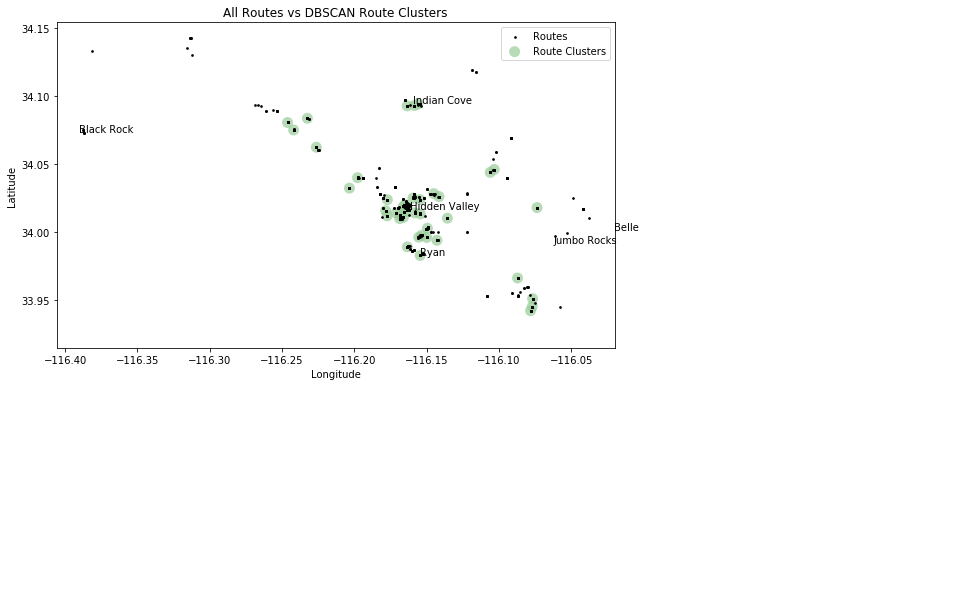

Number of clusters: 42


In [28]:
data = pd.read_csv("~/Documents/jtnp_routesAndDesc_joined_reducedv2.csv")
coords = data.as_matrix(columns=['latitude', 'longitude'])
kms_per_radian = 6371.0088
epsilon = .1 / kms_per_radian
min_sample=10
db = DBSCAN(eps=epsilon, min_samples=min_sample, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])

def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

#Find the point in each cluster that is closest to its centroid
centermost_points = []
for cluster in clusters.iteritems():
    if len(cluster[1]) >= min_sample:
        centermost_points.append(get_centermost_point(cluster[1]))
        #print(centermost_points)

lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})

rs = rep_points.apply(lambda row: data[(data['latitude']==row['lat']) & (data['longitude']==row['lon'])].iloc[0], axis=1)
rs_centroids = rs[['latitude','longitude']]
#rs_centroids

campsites = pd.read_csv("~/Documents/jtnp_campsite_coords.csv")
y = campsites['latitude']
z = campsites['longitude']
n = campsites['campsite']

fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['longitude'], rs['latitude'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
data_scatter = ax.scatter(data['longitude'], data['latitude'], c='k', alpha=0.9, s=3)
#camp_scatter = ax.scatter(campsites['longitude'], campsites['latitude'], c='r', alpha=1, s=30)
ax.set_title('All Routes vs DBSCAN Route Clusters')
#ax.set_title('Route Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
#ax.legend([data_scatter, rs_scatter, camp_scatter], ['Routes', 'Route Clusters', 'Campsites'], loc='upper right')
ax.legend([data_scatter, rs_scatter, camp_scatter], ['Routes', 'Route Clusters'], loc='upper right')
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.show()

print('Number of clusters: {}'.format(num_clusters))

In [17]:
n = campsites['campsite']
campsites

,campsite,latitude,longitude
0,Belle,34.0018,-116.0203
1,Black Rock,34.0736,-116.3901
2,Cottonwood,33.7429,-115.8151
3,Hidden Valley,34.0170,-116.1615
4,Indian Cove,34.0948,-116.1594
5,Jumbo Rocks,33.9919,-116.0625
6,Ryan,33.9830,-116.1547
7,White Tank,33.9848,-116.0167


In [22]:
data.head()

,index,id,name,type,rating,diffcategory,diffcatnum,stars,starvotes,pitches,location,url,imgsqsmall,imgsmall,imgsmallmed,imgmedium,longitude,latitude,description
0,0,105725464,JBMFP,Boulder,V5,hard,3,4.9,124,NaN,"{California,""Joshua Tree National Park"",""*Josh...",https://www.mountainproject.com/route/10572546...,https://cdn-files.apstatic.com/climb/110869832...,https://cdn-files.apstatic.com/climb/110869832...,https://cdn-files.apstatic.com/climb/110869832...,https://cdn-files.apstatic.com/climb/110869832...,-116.1654,34.0148,This classic problem takes a proud line direct...
1,1,105722992,Pigpen,Boulder,V4,hard,3,4.9,96,NaN,"{California,""Joshua Tree National Park"",""*Josh...",https://www.mountainproject.com/route/10572299...,https://cdn-files.apstatic.com/climb/116126755...,https://cdn-files.apstatic.com/climb/116126755...,https://cdn-files.apstatic.com/climb/116126755...,https://cdn-files.apstatic.com/climb/116126755...,-116.1581,34.0154,Behind Cyclops rock is this awesome boulder pr...
2,2,105722755,Slashface,Boulder,V3 R,medium,2,4.9,79,NaN,"{California,""Joshua Tree National Park"",""*Josh...",https://www.mountainproject.com/route/10572275...,https://cdn-files.apstatic.com/climb/106344662...,https://cdn-files.apstatic.com/climb/106344662...,https://cdn-files.apstatic.com/climb/106344662...,https://cdn-files.apstatic.com/climb/106344662...,-116.0870,33.9534,Another of Joshua Tree's finest boulder proble...
3,3,105722350,Gunsmoke,Boulder,V3,medium,2,4.6,280,NaN,"{California,""Joshua Tree National Park"",""*Josh...",https://www.mountainproject.com/route/10572235...,https://cdn-files.apstatic.com/climb/112179623...,https://cdn-files.apstatic.com/climb/112179623...,https://cdn-files.apstatic.com/climb/112179623...,https://cdn-files.apstatic.com/climb/112179623...,-116.1446,34.0280,"Classic. Like Yosemite's Midnight Lightning, ..."
4,4,105722608,Stem Gem,Boulder,V4,hard,3,4.7,107,NaN,"{California,""Joshua Tree National Park"",""*Josh...",https://www.mountainproject.com/route/10572260...,https://cdn-files.apstatic.com/climb/106341989...,https://cdn-files.apstatic.com/climb/106341989...,https://cdn-files.apstatic.com/climb/106341989...,https://cdn-files.apstatic.com/climb/106341989...,-116.1636,34.0184,Located in a small group of campsites on the S...
